In [9]:
# pulling 1-100 pages to give around 10000 books to briefly browse data
# to get an idea of the system
import pandas as pd

import matplotlib.pyplot as pyplot
%matplotlib inline

import seaborn as sns

In [6]:
books = pd.read_csv('pages-1-100.csv', sep=',')

In [7]:
books.head(2)

,title,original_title,series,language,authors,avg_rating,num_ratings,num_reviews,genres,description,url
0,The Canterbury Tales,Tales of Caunterbury,NaN,English,"Geoffrey Chaucer,Nevill Coghill (Translator)",3.49,176459,3099,"Classics,Fiction,Poetry,Literature,Academic,Sc...",The procession that crosses Chaucer's pages is...,https://www.goodreads.com/book/show/2696.The_C...
1,The Things They Carried,The Things They Carried,NaN,English,Tim O'Brien,4.13,233187,13213,"Fiction,Historical,Historical Fiction,War,Clas...","In 1979, Tim O'Brien's Going After Cacciato —a...",https://www.goodreads.com/book/show/133518.The...


In [11]:
# Missing Values
# 'series' is missing the most
books.isnull().sum().sort_values(ascending=False)

series            4717
original_title     992
language           268
genres              93
description         69
url                  0
num_reviews          0
num_ratings          0
avg_rating           0
authors              0
title                0
dtype: int64

In [13]:
# Mising Genres
# Find the genres manually
books[books.genres.isnull()].head(2).url.values


array(['https://www.goodreads.com/book/show/43524300-take-my-heart',
       'https://www.goodreads.com/book/show/44416211-the-candidate-and-other-stories'],
      dtype=object)

In [14]:
# Missing description
books[books.description.isnull()].head(2).url.values

array(['https://www.goodreads.com/book/show/30474.The_Communist_Manifesto',
       'https://www.goodreads.com/book/show/80176.Winesburg_Ohio'],
      dtype=object)

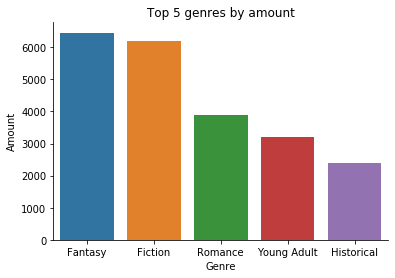

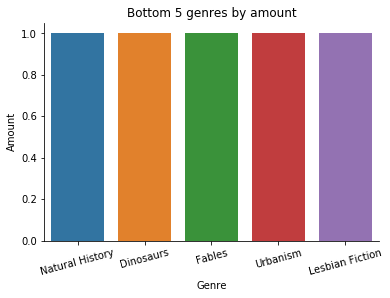

In [24]:
# Genres
# Look at which genres exist and how many books are in each category

# Split all strings and manipulate so that we have an index per row repeated as many times as there is genres for that entry.
split_genres = books.loc[books.genres.notnull(), 'genres'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)

# Count how many entries exist per category and sort them.
split_genres_counts = split_genres.value_counts().sort_values(ascending=False)

# Plot the top 5
sns.barplot(y=split_genres_counts[:5], x = split_genres_counts.index[:5])
sns.despine()
pyplot.xlabel('Genre')
pyplot.ylabel('Amount')
pyplot.title('Top 5 genres by amount')
pyplot.show()

# Bottom 5
g = sns.barplot(y=split_genres_counts[-5:], x=split_genres_counts.index[-5:])
g.set_xticklabels(g.get_xticklabels(), rotation=15, ha='center')
sns.despine()
pyplot.xlabel('Genre')
pyplot.ylabel('Amount')
pyplot.title('Bottom 5 genres by amount')
pyplot.show()

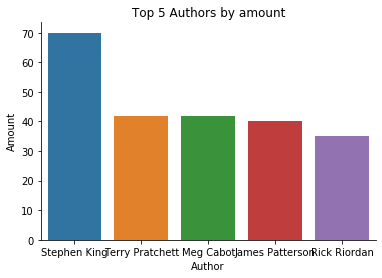

In [25]:
# Split and find the most popular author.

# split
split_authors = books.loc[books.authors.notnull(), 'authors'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)

# count
split_authors_counts = split_authors.value_counts().sort_values(ascending=False)

# Plot the top 5
sns.barplot(y=split_authors_counts[:5], x = split_authors_counts.index[:5])
sns.despine()
pyplot.xlabel('Author')
pyplot.ylabel('Amount')
pyplot.title('Top 5 Authors by amount')
pyplot.show()

# Bottom 5
j = sns.barplot(y=split_authors_counts[-5:], x=split_authors_counts.index[-5:])
j.set_xticklabels(j.get_xticklabels(), rotation=15, ha='center')
sns.despine()
pyplot.xlabel('Author')
pyplot.ylabel('Amount')
pyplot.title('Bottom 5 Authors by amount')
pyplot.show()


In [ ]:
# Split and find the most popular series.

# split
split_series = books.loc[books.series.notnull(), 'series'].str.split(',', expand=True).stack().reset_index(level=-1, drop=True)

# count
split_series_counts = split_series.value_counts().sort_values(ascending=False)

# Plot the top 5
sns.barplot(y=split_series_counts[:5], x = split_series_counts.index[:5])
sns.despine()
pyplot.xlabel('Author')
pyplot.ylabel('Amount')
pyplot.title('Top 5 Series by amount')
pyplot.show()

# Bottom 5
h = sns.barplot(y=split_series_counts[-5:], x=split_series_counts.index[-5:])
h.set_xticklabels(h.get_xticklabels(), rotation=15, ha='center')
sns.despine()
pyplot.xlabel('Series')
pyplot.ylabel('Amount')
pyplot.title('Bottom 5 Series by amount')
pyplot.show()